### Problem Statement:

#### What?

The task is to predict price for the houses present in King County, Washington, US. using the most efficient model. We have a training and testing dataset that includes details of homes sold between May 2014 and May 2015. The column description is as below: 

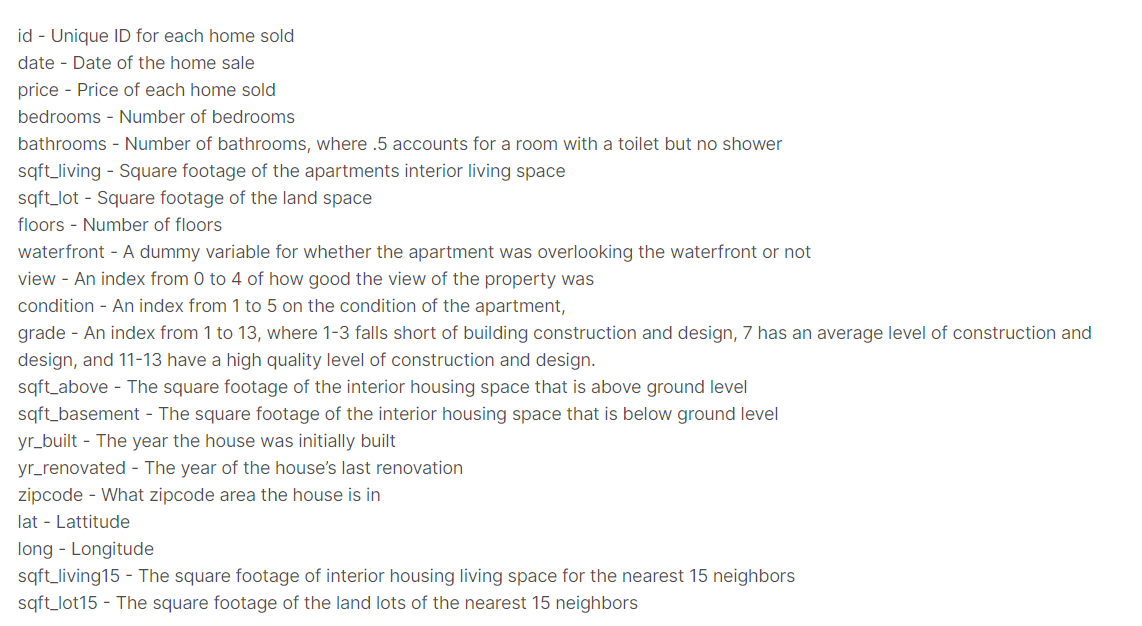

#### Why?

This model will help us to evaluate the present price of a house located in KC based on its features. Also creating a model to predict the house price will help those who want to sell their homes to transact a good deal. 

#### How?

* Step-1: Formulate question/hypothesis


* Step-2: Exploratory Data Analysis (Using previously created function to plot the necessary graphs)


* Step-3: Finding predictors that help in fitting the most accurate linear regression model


* Step-4: Calculating the CV-score for the considered predictors


* Step-5: Experimenting with feature transformations and generations techniques to find if this improves the performance of the model


* Step-6: Use forward selection and backward elimination method to select an appropriate model


* Step-7: Using decision tree to fit all the transformed/feature-generated data by using the tuned hyper-parameters.


* Step-8: Testing the best performing model using the test data and reporting the results

#### Expected Output:

R2, RMSE of all the created models using training data. Using the lowest RMSE value(highest R2) to select the final model and fitting the same on test data. RMSE and MAE of the predicted data is calculated for final inferences.

Root Mean Squared Error (RMSE)and Mean Absolute Error (MAE) are metrics used to evaluate a Regression Model. These metrics tell us how accurate our predictions are and, what is the amount of deviation from the actual values.

Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). **Residuals are a measure of how far from the regression line data points are**; RMSE is a measure of how to spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit.Root mean square error or root mean square deviation is one of the most commonly used measures for evaluating the quality of predictions. It shows how far predictions fall from measured true values using Euclidean distance.

Mean Absolute Error is a model evaluation metric used with regression models. The mean absolute error of a model with respect to a test set is the mean of the absolute values of the individual prediction errors on over all instances in the test set.


### Importing the Libraries

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random
import math
import seaborn as sns

#from functions import graphs_r1 - previously created graph function
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings("ignore")

Statsmodels is a python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. An extensive list of result statistics are available for each estimator.Both libraries have their uses.(Scikit learn vs statsmodel) Before selecting one over the other, it is best to consider the purpose of the model. A model designed for prediction is best fit using scikit-learn, while statsmodels is best employed for explanatory models

Scikit-learn (formerly scikits.learn and also known as sklearn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support-vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy

In [20]:
house = pd.read_csv('kc_house_train_data.csv') #to read the data

In [21]:
house.shape #The dataframe have 21 columns and 9761 rows

(9761, 21)

In [22]:
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,...,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,...,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208


In [23]:
house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,9.761000e+03,9.761000e+03,9761.000000,9761.000000,9761.000000,9.761000e+03,9761.000000,9761.000000,9761.000000,9761.000000,9761.00000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000
mean,4.605288e+09,5.427350e+05,3.375884,2.117175,2086.734146,1.521526e+04,1.486067,0.008401,0.248028,3.415531,7.66151,1793.291159,293.442987,1970.799508,86.066592,98077.790185,47.560052,-122.214322,1992.359697,12824.785165
std,2.876044e+09,3.795276e+05,0.960697,0.773971,927.194303,4.126673e+04,0.532317,0.091275,0.787877,0.650552,1.18268,835.763817,442.612722,29.240009,405.417369,53.203594,0.140236,0.139895,687.322247,26518.337402
min,1.200019e+06,8.000000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.00000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.514000,620.000000,660.000000
25%,2.126049e+09,3.200000e+05,3.000000,1.750000,1420.000000,5.100000e+03,1.000000,0.000000,0.000000,3.000000,7.00000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.467800,-122.327000,1490.000000,5160.000000
50%,3.905041e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.00000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.572200,-122.229000,1840.000000,7660.000000
75%,7.338403e+09,6.490000e+05,4.000000,2.500000,2570.000000,1.066000e+04,2.000000,0.000000,0.000000,4.000000,8.00000,2230.000000,570.000000,1996.000000,0.000000,98117.000000,47.680400,-122.126000,2370.000000,10113.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.00000,8860.000000,3480.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.319000,5790.000000,560617.000000


In [24]:
house.isnull().sum() #to find out number of null values in each column

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [25]:
house.dtypes #to find datatypes of each features

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [26]:
house.nunique() #No of uniques values in each columns

id               9720
date              357
price            2533
bedrooms           13
bathrooms          28
sqft_living       730
sqft_lot         5581
floors              6
waterfront          2
view                5
condition           5
grade              11
sqft_above        665
sqft_basement     251
yr_built          116
yr_renovated       65
zipcode            70
lat              4186
long              666
sqft_living15     588
sqft_lot15       5147
dtype: int64

**Target variable** - Price**

**Categorical predictors** - Date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long

Total categorical predictors -**13**


**Numerical predictors** - sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15

Total numerical predictors - **6**

### 1.Questions

1. Id is similar to Serial No and is not required to fit the model
2. Does minor change in latitiude and longitude affect the house price
3. Is the presence of basement affecting the house price
4. Is Condition inversely proportional to the house price
5. Does the house price depend on what year it was built and the year it was renovated(if any)
6. Does the house price really depend on the neighbouring house's living area?
7. Does the absence of complete bedrooms & bathrooms affect the house price?
8. There are 6 zero entries in bedroom column and 4 zero entries in bathroom column. Are they missing values?
9. One house has 33 bedrooms and 1.75 bathroom. Anamoly?
10. Is the presence of half floors affecting the house prices?
12. Change the date format present in the dataset

# 2.EDA

In [27]:
import os                                            #importing os
import pandas as pd                                  #importing pandas library
import matplotlib.pyplot as plt                      #importing matplotlib.pyplot
import numpy as np                                   #importing numpy library
def graphs(df,cols=[],directory=os.getcwd(),fileformat='jpg'):        #function is defined with default value for directory
    length=len(df)                                   #length of the dataframe is stored in a variable
    cwd = os.getcwd()                                #current working directory is stored in a variable
    os.chdir(directory)                              #if the user gives a directory, the same is changed
    if len(cols) != 0:                               #if the user specifies the number of columns, this statement is executed
        df = df[cols]                                #only the specified columns are considered in the dataframe
    if df.iloc[:,0].max() == len(df):                #if the first column is a serial number
        df = df.iloc[:,1:]                           #we remove it
    for i in range(0,df.shape[1]):                   #for the entire dataframe
        if df.iloc[:,i].isnull().sum() > 0:          #if there are null values present in any column
            df = df.dropna(subset=[df.columns[i]])   #we drop it as boxplot can't be plotted for null values
    catg_df = df.select_dtypes('object')             #variables with object dtypes are set as categorical variables dataframe
    num_df = df.select_dtypes(exclude='object')      #variables which are NOT object dtypes are set as numerical variables dataframe
    catg_check = ((num_df.dtypes!=float) & (num_df.var() < 20) & (num_df.nunique() < 0.08*(length))) #numerical variables which are not of float dtype, has variance less than 20 and unique values less than 8% of the length of dataframe is retrieved 
    a = catg_check[catg_check].index                 #The index of such variables are stored as an array
    a = df[a]                                        #dataframe is created with such variables
    catg_df = pd.concat([catg_df,a],axis=1)          #we are merging the newly created categorial dataframe and earlier created object dataframe together
    num_df = num_df.drop(columns=a)                  #dropping the categorical variable(dtype=int) from the numerical variable dataframe
    if len(catg_df) > 0:                             #if the user input data has categorical values
        for i in range(0,catg_df.shape[1]):          #for all categorical variables
            if catg_df.iloc[:,i].nunique() > 100:    #if the number of unique values in that variable is more than 100
                catg_df.iloc[:,i].value_counts().plot(kind='barh',figsize=(25,100),color='maroon') #such large sized graph is plotted
                plt.ylabel(catg_df.columns[i],fontsize=16)     #setting y-axis labels and fontsize
                plt.xlabel('Count',fontsize=16)                #setting x-axis labels and fontsize
                plt.title('Frequency Chart',fontsize=18)       #setting title name and fontsize
                plt.savefig(str(catg_df.columns[i])+'.'+fileformat)    #we are saving the graph as an image in png format(file name - name of categorical variable)
                plt.show()                                     #displaying the graph as an output                    
            else:                                    #if the number of unique values in that variable is less than or equal to 100
                catg_df.iloc[:,i].value_counts().plot(kind='barh',figsize=(12,6),color='maroon')    #such regular sized graph is plotted
                plt.ylabel(catg_df.columns[i],fontsize=16)     #setting y-axis labels and fontsize
                plt.xlabel('Count',fontsize=16)                #setting x-axis labels and fontsize
                plt.title('Frequency Chart',fontsize=18)       #setting title name and fontsize
                plt.savefig(str(catg_df.columns[i])+'.'+fileformat)    #we are saving the graph as an image in png format(file name - name of categorical variable)
                plt.show()                                     #displaying the graph as an output            
            for j in range(0,num_df.shape[1]):
                if catg_df.iloc[:,i].nunique() > 100:
                    df[[catg_df.columns[i],num_df.columns[j]]].groupby([catg_df.columns[i]]).mean().sort_values(num_df.columns[j],ascending=False).plot(kind='bar',color='maroon',figsize=(100,25))
                    plt.ylabel('Average '+num_df.columns[j],fontsize=16)
                    plt.title('Average '+num_df.columns[j]+' of different '+catg_df.columns[i],fontsize=18)
                    plt.savefig('Average '+num_df.columns[j]+' of different '+catg_df.columns[i]+'.'+fileformat)
                    plt.show()                    
                else:
                    df[[catg_df.columns[i],num_df.columns[j]]].groupby([catg_df.columns[i]]).mean().sort_values(num_df.columns[j],ascending=False).plot(kind='bar',color='maroon',figsize=(6,12))
                    plt.ylabel('Average '+num_df.columns[j],fontsize=16)
                    plt.title('Average '+num_df.columns[j]+' of different '+catg_df.columns[i],fontsize=18)
                    plt.savefig('Average '+num_df.columns[j]+' of different '+catg_df.columns[i]+'.'+fileformat)
                    plt.show()
    if len(num_df) > 0:                                    #if the user input data has numerical values
        for i in range(0,num_df.shape[1]):                 #for all numerical variables
            fig, (ax1, ax2) = plt.subplots(2, 1)           #subplot method is called to plot two graphs at the same time
            fig.suptitle(num_df.columns[i],fontsize=20)    #setting title name and fontsize
            ax1.boxplot(num_df.iloc[:,i],vert=False,patch_artist=True,boxprops = dict(facecolor='green'),
               medianprops = dict(color='black'))          #boxplot is plotted on the top
            ax2.hist(num_df.iloc[:,i],color='maroon',edgecolor='black') #histogram is plotted below the boxplot
            ax2.set_xlabel('Units',fontsize=14)            #setting x-axis labels and fontsize
            ax2.set_ylabel('Frequency',fontsize=14)        #setting x-axis labels and fontsize
            fig.set_figheight(10)                          #setting the graph height
            fig.set_figwidth(8)                            #setting the graph width
            plt.savefig(str(num_df.columns[i])+'.'+fileformat)     #we are saving the graph as an image in png format(file name - name of numerical variable)
            plt.show()                                     #displaying the graph as an output
    if len(catg_df) > 0 and len(num_df > 0):
        for i in range(0,catg_df.shape[1]):          #for all categorical variables
            if catg_df.iloc[:,i].nunique() > 100:
                for j in range(0,num_df.shape[1]):
                    df.boxplot(column=num_df.columns[j],by=catg_df.columns[i],figsize=(100,25),patch_artist=True,boxprops = dict(facecolor='green'),
               medianprops = dict(color='black'))
                    plt.xticks(rotation=90)
                    plt.savefig('Boxplot of '+num_df.columns[j]+' grouped by '+catg_df.columns[i]+'.'+fileformat)
                    plt.show()
            else:
                for j in range(0,num_df.shape[1]):
                    df.boxplot(column=num_df.columns[j],by=catg_df.columns[i],grid=False,figsize=(8,6),patch_artist=True,boxprops = dict(facecolor='green'),
               medianprops = dict(color='black'))
                    plt.savefig('Boxplot of '+num_df.columns[j]+' grouped by '+catg_df.columns[i]+'.'+fileformat)
                    plt.show()         
    os.chdir(cwd)                                          #changing the directory to current working directory

In [28]:
#graphs(house,directory=r'D:\Praxis Buisness School\Mini Projects for Resume\Mahi7\Prediction\House price\graph') #previously created graph function

In [29]:
df = house #make a copy

In [30]:
#Correcting 33 bedroom data #Bi-variate frequency distribution table
pd.crosstab(df.iloc[:,4],columns=df.iloc[:,3])

bedrooms,0,1,2,3,4,5,6,7,8,9,10,11,33
bathrooms,,,,,,,,,,,,,
0.00,4,0,0,0,0,0,0,0,0,0,0,0,0
0.75,1,10,17,8,1,0,0,0,0,0,0,0,0
1.00,1,61,702,818,139,18,1,1,0,0,0,0,0
1.25,0,0,2,3,0,0,0,0,0,0,0,0,0
1.50,0,7,123,330,111,24,3,1,0,0,0,0,0
1.75,0,3,149,875,330,68,5,0,0,0,0,0,1
2.00,0,4,109,461,243,42,11,0,0,0,1,0,0
2.25,0,1,46,511,317,55,5,2,0,0,0,0,0
2.50,0,2,89,1054,1121,128,13,1,1,0,0,0,0


Since 1.75 bathrooms has more number of 3 bedrooms, we are replacing the 33 bedroom value with 3

In [31]:
df [df['bedrooms'] == 33] = 3 #replacing 33 bedrooms with 3 bedrooms

Date has a suffix junk value of T000000 so we are removing it

In [32]:
df['date'] = df['date'].str.replace(r'T000000','') #removing suffix from date_part

Comparing all the categorical columns and analysing it

In [33]:
catg = ['bedrooms','bathrooms','floors','waterfront','view','condition','grade','yr_built','yr_renovated']
for i in catg:
    for j in catg:
        if j!=i:
            print(pd.crosstab(df[i],columns=df[j]))

bathrooms  0.00  0.75  1.00  1.25  1.50  1.75  2.00  2.25  2.50  2.75  ...  \
bedrooms                                                               ...   
0             4     1     1     0     0     0     0     0     0     0  ...   
1             0    10    61     0     7     3     4     1     2     0  ...   
2             0    17   702     2   123   149   109    46    89     6  ...   
3             0     8   818     3   330   875   461   511  1054   116  ...   
4             0     1   139     0   111   330   243   317  1121   291  ...   
5             0     0    18     0    24    68    42    55   128    98  ...   
6             0     0     1     0     3     5    11     5    13    12  ...   
7             0     0     1     0     1     0     0     2     1     1  ...   
8             0     0     0     0     0     0     0     0     1     1  ...   
9             0     0     0     0     0     0     0     0     0     0  ...   
10            0     0     0     0     0     0     1     0     0 

yr_built   3     1900  1901  1902  1903  1904  1905  1906  1907  1908  ...  \
bathrooms                                                              ...   
0.00          0     0     0     0     0     0     0     0     0     0  ...   
0.75          0     0     0     0     1     0     0     0     0     0  ...   
1.00          0    11     7     3     8    14    15    13    11    21  ...   
1.25          0     0     0     0     0     0     0     0     0     0  ...   
1.50          0     5     0     0     1     5     2     3     4     2  ...   
1.75          0     4     0     1     5     4     1     7     0     5  ...   
2.00          0     9     1     2     1     2     6     5     4     5  ...   
2.25          0     1     1     0     1     0     1     1     2     2  ...   
2.50          0     2     0     3     0     0     0     2     2     1  ...   
2.75          0     2     1     0     1     1     2     1     0     1  ...   
3.00          1     3     0     0     0     0     4     2     1 

grade   1   3   4   5    6     7     8    9    10   11  12  13
floors                                                        
1.0      1   0  16  96  749  2682  1025  200   72   15   4   1
1.5      0   0   1  11  132   466   173   56   23    5   0   0
2.0      0   0   0   0   32   871  1337  885  418  139  37   4
2.5      0   0   0   0    1     5    21   19    8    6   0   2
3.0      0   1   0   0    0    42   150   32   11    7   3   0
3.5      0   0   0   0    0     0     1    0    0    0   1   0
yr_built  3     1900  1901  1902  1903  1904  1905  1906  1907  1908  ...  \
floors                                                                ...   
1.0          0     8     1     2     5    13    11    17     9    16  ...   
1.5          0    19     4     3    12    11     7    12     2    15  ...   
2.0          0     8     5     2     1     2    13     6    11    11  ...   
2.5          0     2     0     2     0     0     2     2     3     0  ...   
3.0          1     0     0     0  

condition  1   2     3     4    5
view                             
0          8  76  5700  2319  644
1          0   0    91    54   15
2          0   1   273   121   59
3          0   1   147    69   27
4          2   0    81    47   26
grade  1   3   4    5    6     7     8    9    10  11  12  13
view                                                         
0       1   0  14  100  876  3866  2402  980  380  99  27   2
1       0   0   2    1    5    43    57   29   14   9   0   0
2       0   0   1    3   19   101   148   91   59  23   7   2
3       0   1   0    1    8    37    68   58   43  25   2   1
4       0   0   0    2    6    19    32   34   36  16   9   2
yr_built  3     1900  1901  1902  1903  1904  1905  1906  1907  1908  ...  \
view                                                                  ...   
0            0    31     9     9    15    25    29    33    24    36  ...   
1            0     0     0     0     0     1     2     1     0     0  ...   
2            0     5

bathrooms  0.00  0.75  1.00  1.25  1.50  1.75  2.00  2.25  2.50  2.75  ...  \
grade                                                                  ...   
1             1     0     0     0     0     0     0     0     0     0  ...   
3             0     0     0     0     0     0     0     0     0     0  ...   
4             0    10     7     0     0     0     0     0     0     0  ...   
5             0     6    84     0     2     6     8     0     1     0  ...   
6             0    10   626     1    66   104    87     1     9     6  ...   
7             1    11   966     2   396   879   539   349   627   142  ...   
8             1     0    54     0   128   384   190   443   997   195  ...   
9             0     0     4     1     4    49    42   114   557   126  ...   
10            0     0     0     0     2     6     5    29   184    50  ...   
11            0     0     0     1     1     2     0     1    30     5  ...   
12            1     0     0     0     0     0     0     0     4 

bedrooms  0   1   2   3    4   5   6   7   8   9   10  11
yr_built                                                 
3          0   0   0   1    0   0   0   0   0   0   0   0
1900       0   0   7  15   12   1   2   0   0   0   0   0
1901       0   0   2   3    3   2   0   0   0   0   0   0
1902       0   0   2   4    3   0   0   0   0   0   0   0
1903       0   1   2  12    3   0   0   0   0   0   0   0
...       ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..
2011       0   1   4  20   19   6   0   0   0   0   0   0
2012       0   0   5  28   34  10   1   0   0   0   0   0
2013       0   0   2  29   48  10   2   1   0   0   0   0
2014       0   0  10  85  104  44   0   0   0   0   0   0
2015       0   0   2   6    8   6   0   0   0   0   0   0

[117 rows x 12 columns]
bathrooms  0.00  0.75  1.00  1.25  1.50  1.75  2.00  2.25  2.50  2.75  ...  \
yr_built                                                               ...   
3             0     0     0     0     0     0     0     0     0  

grade         1   3   4    5    6     7     8     9    10   11  12  13
yr_renovated                                                          
0              1   0  16  104  868  3912  2587  1131  505  165  45   5
3              0   1   0    0    0     0     0     0    0    0   0   0
1940           0   0   0    0    1     0     0     0    0    0   0   0
1945           0   0   0    0    1     1     0     0    0    0   0   0
1946           0   0   0    0    1     1     0     0    0    0   0   0
...           ..  ..  ..  ...  ...   ...   ...   ...  ...  ...  ..  ..
2011           0   0   0    0    0     4     2     1    0    0   0   0
2012           0   0   0    0    1     0     2     1    0    0   0   0
2013           0   0   0    0    1     5     4     2    1    0   0   0
2014           0   0   0    0    7    14    15     5    1    0   0   0
2015           0   0   0    0    0     0     3     1    1    0   0   0

[66 rows x 12 columns]
yr_built      3     1900  1901  1902  1903  1904  190

In [34]:
df.columns  #display the columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [43]:
df['date'].dtypes 

dtype('float64')

Converting date column type to integer

In [45]:
df['date'] = df['date'].apply(pd.to_numeric)  

In [46]:
df.dtypes

id                 int64
date             float64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Plotting scatter graph of all columns with price

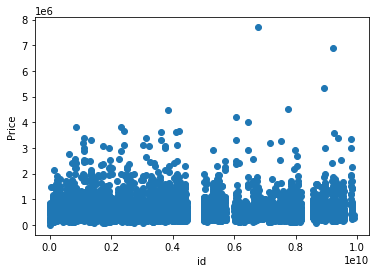

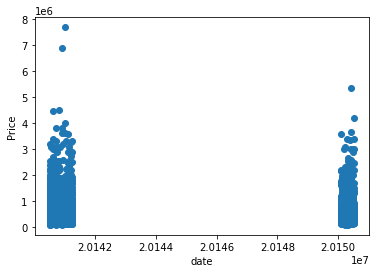

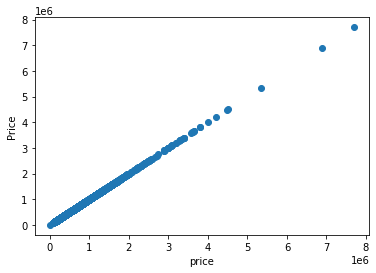

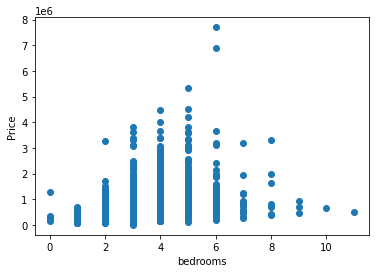

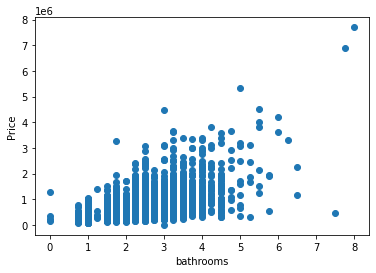

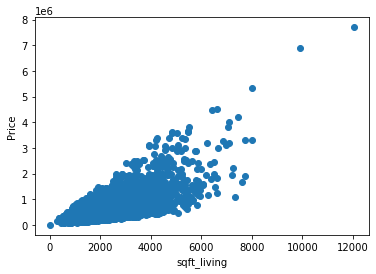

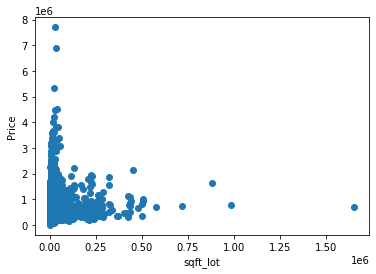

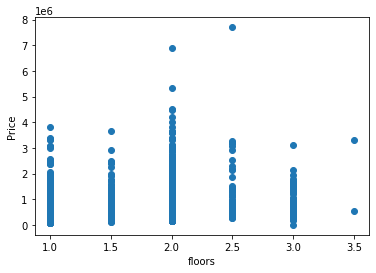

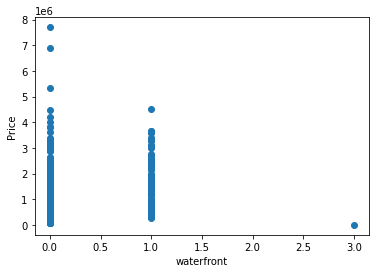

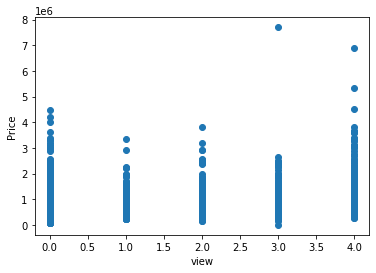

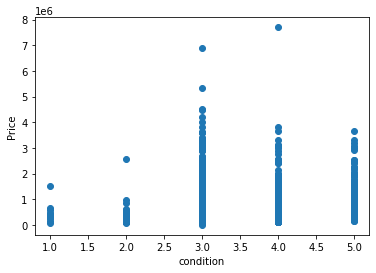

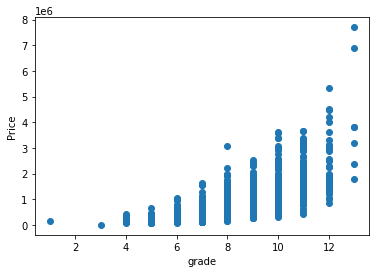

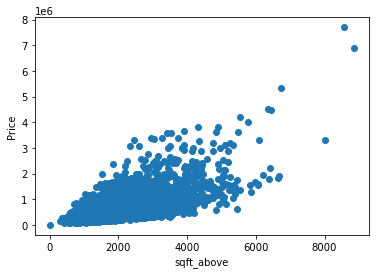

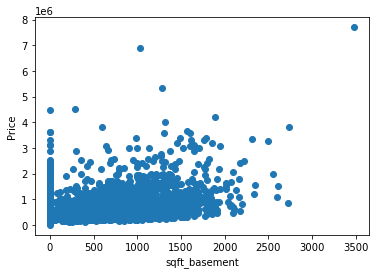

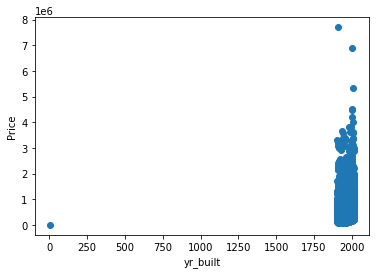

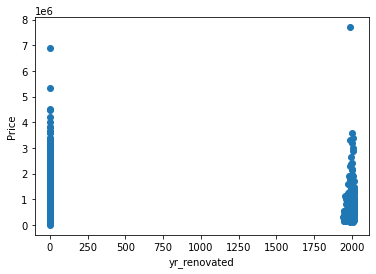

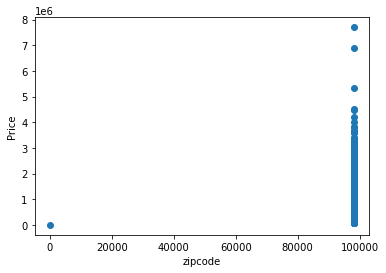

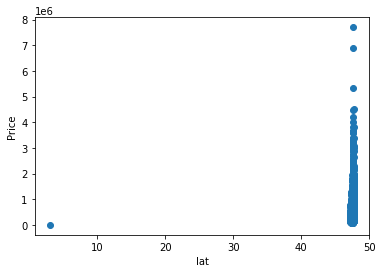

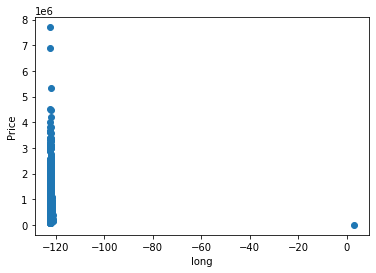

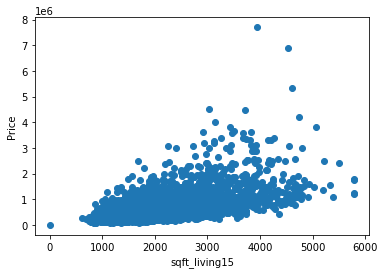

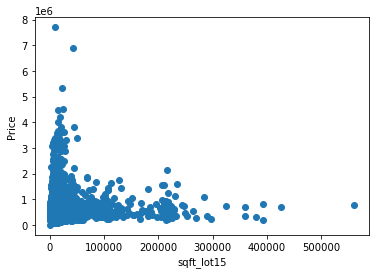

In [38]:
for i in df.columns:
    plt.scatter(df[i],df['price'])
    plt.xlabel(i)
    plt.ylabel('Price')
    plt.show()   

Now we study the above graph and display heat map so that we can find columns having strong correlation with price

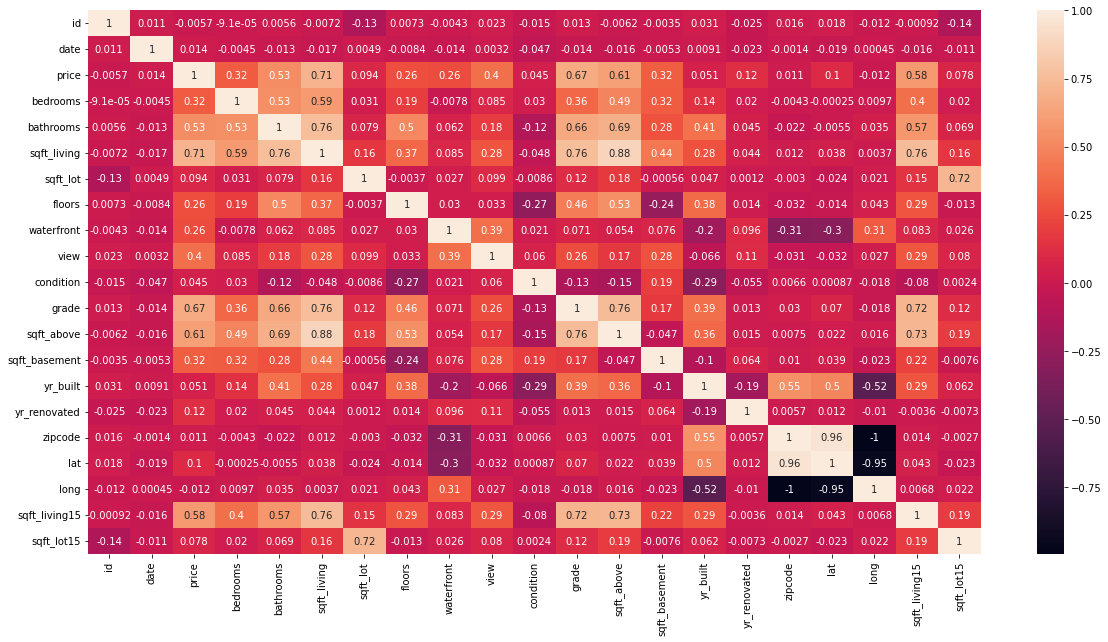

In [39]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

We take the columns sqft_living, grade, sqft_above, sqft_living15, bathrooms, sqft_basement, bedrooms because these columns have corrleation coefficient more than 0.5 with the price column

## 3) Initial model fitting step

Now we construct a linear regression model and keeping above mentioned columns as predictors and target as price. First we add only 1 column sqft_living as predictors and ran the linear regression and then we added a extra column grade and then ran the linear regression and so on. We do this until all columns get added and we compare the R-squared and Adj. R-squared values.

In [47]:
X = df[['sqft_living','grade','sqft_above','sqft_living15','bathrooms','sqft_basement','bedrooms']] #corr with price > 0.5 in descending order
y = df[['price']]

for i in range (1,X.shape[1]+1):        #for_loop for taking columns 1 by 1
    x = pd.DataFrame(X.iloc[:,0:i])     #Adding columns 1 by 1
    x = sm.add_constant(x)              #An intercept is not included by default and should be added by the user otherwise R_square will be negative
    model = sm.OLS(y,x).fit()           #fitting linear regression
    print(model.summary())              #printing the result

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     9652.
Date:                Sat, 05 Nov 2022   Prob (F-statistic):               0.00
Time:                        13:39:50   Log-Likelihood:            -1.3589e+05
No. Observations:                9761   AIC:                         2.718e+05
Df Residuals:                    9759   BIC:                         2.718e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -5.951e+04   6707.582     -8.872      

By the above Result we infer that when we add all columns we get high R-squared values and the adjusted R2 is also increasing and p(F-statistic) is also 0. But the p(t-statistic) is more than 0.05 for certain columns. We are not including such columns with more than the threshold p(t-statistic) value 0.05.

So we add columns which have correlation above 0.5, yielding more adjusted R2 and p(F-statistic) and p(t-statistic) < 0.05 in our training predictors with price as our target variable

In [41]:
X = df[['sqft_living','grade','sqft_above','sqft_living15','bathrooms']]
y = df[['price']]                                                            #target is price
print('Linear Regression model')
lr = LinearRegression() 
cv_scores = []
scores = cross_val_score(lr,X,y,cv=10,scoring='neg_root_mean_squared_error') #10-fold cross-validation for calculating RMSE
cv_scores.append(abs(scores.mean()))                                         #appending all mean scores
print('RMSE:',cv_scores)                                                     #Root mean squared error is printed

cv_scores = []
scores = cross_val_score(lr,X,y,cv=10,scoring='r2')                          #10-fold cross-validation fo calculatingr R2
cv_scores.append((scores.mean()))
print('R2:',cv_scores)                                                       #R-squared is printed


Linear Regression model
RMSE: [256286.3884300668]
R2: [0.5367471034339223]


In [42]:
X = df[['sqft_living','grade','sqft_above','sqft_living15','bathrooms']]
y = df[['price']]                                                            #target is price
print('Linear Regression model')
lr = LinearRegression() 
cv_scores = []
scores = cross_val_score(lr,X,y,cv=10,scoring='neg_root_mean_squared_error')
scores
cv_scores.append(abs(scores.mean()))                                         #appending all mean scores
print('RMSE:',cv_scores)                                                     #Root mean squared error is printed

cv_scores = []
scores = cross_val_score(lr,X,y,cv=10,scoring='r2')                          #10-fold cross-validation fo calculatingr R2
cv_scores.append((scores.mean()))
print('R2:',cv_scores)                                                       #R-squared is printed

Linear Regression model
RMSE: [256286.3884300668]
R2: [0.5367471034339223]


The above considered predictors give us,

RMSE as 256286.388 

R-squared as 0.5367

# 4) Feature engineering 

**a) Log X**

In [51]:
X = df[['sqft_living','grade','sqft_above','sqft_living15']] #bathrooms column removed as log transformation yields infinity value
y = df[['price']]
print('Linear Regression model with feature transformation log X for predictors')
X = np.log(X)                #we apply feature transformation for predictors
cv_scores = []
scores = cross_val_score(lr,X,y,cv=10,scoring='neg_root_mean_squared_error') #10-fold cross-validation for calculating RMSE
cv_scores.append(abs(scores.mean()))
print('RMSE:',cv_scores)
cv_scores = []
scores = cross_val_score(lr,X,y,cv=10,scoring='r2')                          #10-fold cross-validation fo calculatingr R2
cv_scores.append((scores.mean()))
print('R2:',cv_scores)

# for i in X:
#     plt.scatter(X[i],df['price'])
#     plt.xlabel(i)
#     plt.ylabel('Price')
#     plt.show()   

Linear Regression model with feature transformation log X for predictors
RMSE: [282642.99031111493]
R2: [0.4389033066559076]


When we feature transform by taking log for predictors the RMSE increases and R2 decreases so this model becomes less effective

**b) Sqrt(X)**

In [54]:
X = df[['sqft_living','grade','sqft_above','sqft_living15','bathrooms']]
y = df[['price']]
print('Linear Regression model with feature transformation sqrt(X) for predictors')
X = np.sqrt(X)             #we apply feature transformation for predictors
cv_scores = []
scores = cross_val_score(lr,X,y,cv=10,scoring='neg_root_mean_squared_error') #10-fold cross-validation for calculating RMSE
cv_scores.append(abs(scores.mean()))
print('RMSE:',cv_scores)
cv_scores = []
scores = cross_val_score(lr,X,y,cv=10,scoring='r2')                          #10-fold cross-validation for calculating R2
cv_scores.append((scores.mean()))
print('R2:',cv_scores)

# for i in X:
#     plt.scatter(X[i],df['price'])
#     plt.xlabel(i)
#     plt.ylabel('Price')
#     plt.show()   

Linear Regression model with feature transformation sqrt(X) for predictors
RMSE: [268697.8214317719]
R2: [0.4922410235990216]


When we feature transform by taking sqrt for predictors the RMSE increases and R2 decreases so this model becomes less effective

**c) X^2**

In [59]:
X = df[['sqft_living','grade','sqft_above','sqft_living15','bathrooms']]
y = df[['price']]
print('Linear Regression model with feature transformation X^2 for predictors')
X = X**2                   #we apply feature transformation for predictors
cv_scores = []
scores = cross_val_score(lr,X,y,cv=10,scoring='neg_root_mean_squared_error') #10-fold cross-validation for calculating RMSE
cv_scores.append(abs(scores.mean()))
print('RMSE:',cv_scores)
cv_scores = []
scores = cross_val_score(lr,X,y,cv=10,scoring='r2')                          #10-fold cross-validation for calculating R2
cv_scores.append((scores.mean()))
print('R2:',cv_scores)

# for i in X:
#     plt.scatter(X[i],df['price'])
#     plt.xlabel(i)
#     plt.ylabel('Price')
#     plt.show()  

Linear Regression model with feature transformation X^2 for predictors
RMSE: [236617.50287218834]
R2: [0.601539922842601]


When we feature transform by taking X^2 for predictors the RMSE decreases and R2 increases so this model seems to be effective

**d) X^3**

In [60]:
X = df[['sqft_living','grade','sqft_above','sqft_living15','bathrooms']]
y = df[['price']]
print('Linear Regression model with feature transformation X^3 for predictors')
X = X**3                   #we apply feature transformation for predictors
cv_scores = []
scores = cross_val_score(lr,X,y,cv=10,scoring='neg_root_mean_squared_error') #10-fold cross-validation for calculating RMSE
cv_scores.append(abs(scores.mean()))
print('RMSE:',cv_scores)
cv_scores = []
scores = cross_val_score(lr,X,y,cv=10,scoring='r2')                          #10-fold cross-validation for calculating R2
cv_scores.append((scores.mean()))
print('R2:',cv_scores)

Linear Regression model with feature transformation X^3 for predictors
RMSE: [237925.0123625015]
R2: [0.5989500311501194]


When we feature transform by taking X^3 for predictors the RMSE decreases and R2 increases so this model seems to be effective

**e) X1*X2**

In [61]:
X = df[['sqft_living','grade','sqft_above','sqft_living15','bathrooms']]
y = df[['price']]
temp=pd.DataFrame({'sqft_living*living15': X['sqft_living']*X['sqft_living15']})   #multipling 2 rows and combining them                
temp

,sqft_living*living15
0,2665600
1,25799200
2,1542800
3,2545400
4,1876900
...,...
9756,2086000
9757,6350400
9758,7195500
9759,1040400


In [62]:
X = df[['grade','sqft_above','bathrooms']]   
f = [temp,X]
X = pd.concat(f,axis=1,join='inner')          #combining the rows with the multiplied rows 
X

,sqft_living*living15,grade,sqft_above,bathrooms
0,2665600,7,1050,3.00
1,25799200,11,3890,4.50
2,1542800,7,860,1.00
3,2545400,7,1430,1.00
4,1876900,7,1370,1.75
...,...,...,...,...
9756,2086000,8,1490,2.00
9757,6350400,9,2520,2.50
9758,7195500,9,2600,3.50
9759,1040400,7,1020,0.75


In [63]:
cv_scores = []
print('Linear Regression model with feature transformation of multiplying two predictors making as one')
scores = cross_val_score(lr,X,y,cv=10,scoring='neg_root_mean_squared_error') #10-fold cross-validation for calculating RMSE
cv_scores.append(abs(scores.mean()))
print('RMSE:',cv_scores)
cv_scores = []
scores = cross_val_score(lr,X,y,cv=10,scoring='r2')                          #10-fold cross-validation for calculating R2
cv_scores.append((scores.mean()))
print('R2:',cv_scores)

Linear Regression model with feature transformation of multiplying two predictors making as one
RMSE: [254165.71950195325]
R2: [0.54383869064794]


When we feature transform by multiplying 2 predictors the RMSE decreases slightly and R2 increases slightly so this model becomes less effective

**From above all feature transformation we observe that X^2 has the better model compared to other models and X^3 results are closer to the best model**

## One-hot Encoding

With one-hot encoding, we convert each categorical columns into a new one by assigning a dummy variable or value(0 or 1) to those columns.

There are 2 categorical variables in the predictors which we used above so, we use one hot encoding to that 2 columns which is grade and bathrooms.

In [64]:
temp1 = pd.get_dummies(df['grade'],prefix=['grade']) 
temp2 = pd.get_dummies(df['bathrooms'],prefix=['bathrooms'])

In [65]:
temp1 #displaying temp1 as single column grade as been divided into 12 columns

,['grade']_1,['grade']_3,['grade']_4,['grade']_5,['grade']_6,['grade']_7,['grade']_8,['grade']_9,['grade']_10,['grade']_11,['grade']_12,['grade']_13
0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9756,0,0,0,0,0,0,1,0,0,0,0,0
9757,0,0,0,0,0,0,0,1,0,0,0,0
9758,0,0,0,0,0,0,0,1,0,0,0,0
9759,0,0,0,0,0,1,0,0,0,0,0,0


In [67]:
temp2 #displaying temp1 as single column grade as been divided into 28 columns

,['bathrooms']_0.0,['bathrooms']_0.75,['bathrooms']_1.0,['bathrooms']_1.25,['bathrooms']_1.5,['bathrooms']_1.75,['bathrooms']_2.0,['bathrooms']_2.25,['bathrooms']_2.5,['bathrooms']_2.75,...,['bathrooms']_5.0,['bathrooms']_5.25,['bathrooms']_5.5,['bathrooms']_5.75,['bathrooms']_6.0,['bathrooms']_6.25,['bathrooms']_6.5,['bathrooms']_7.5,['bathrooms']_7.75,['bathrooms']_8.0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9756,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9757,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9758,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9759,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
X = df[['sqft_living','sqft_above','sqft_living15','bathrooms']]
f = [X,temp1,temp2] 
X = pd.concat(f,axis=1,join='inner')  #combing the one hot encoded categorical variable to rest of the predictors
y = df[['price']]
print('Linear Regression model with feature engineering of one-hot encoding the categorical variables')
cv_scores = []
scores = cross_val_score(lr,X,y,cv=10,scoring='neg_root_mean_squared_error') #10-fold cross-validation for calculating RMSE
cv_scores.append(abs(scores.mean()))
print('RMSE:',cv_scores)
cv_scores = []
scores = cross_val_score(lr,X,y,cv=10,scoring='r2')                          #10-fold cross-validation for calculating R2
cv_scores.append((scores.mean()))
print('R2:',cv_scores)

Linear Regression model with feature engineering of one-hot encoding the categorical variables
RMSE: [237319.49843323338]
R2: [0.5991054956268271]


We can see that the one-hot encoding technique made the model better so we combine the best feature generation techniques(one-hot encoding) and the best feature transformations which is X^2 together and fit into linear regression

In [69]:
X = df[['sqft_living','sqft_above','sqft_living15','bathrooms']]
f = [X,temp1,temp2]
X = pd.concat(f,axis=1,join='inner')
X = X**2
y = df[['price']]
print('Linear Regression model with feature engineering of one-hot encoding the categorical variables and squared the predictors')
cv_scores = []
scores = cross_val_score(lr,X,y,cv=10,scoring='neg_root_mean_squared_error') #10-fold cross-validation for calculating RMSE
cv_scores.append(abs(scores.mean()))
print('RMSE:',cv_scores)
cv_scores = []
scores = cross_val_score(lr,X,y,cv=10,scoring='r2') #10-fold cross-validation for calculating R2
cv_scores.append((scores.mean()))
print('R2:',cv_scores)

Linear Regression model with feature engineering of one-hot encoding the categorical variables and squared the predictors
RMSE: [233506.6869742645]
R2: [0.6108847738570153]


#### We can conclude that the best model is when we one-hot encoded the categorical variables(feature generation techniques) and squaring the predictors (feature transformations).

In [70]:
X #displayed the values of predictors when feature transformations(X**2) and one-hot encoding done for grade and bathrooms

,sqft_living,sqft_above,sqft_living15,bathrooms,['grade']_1,['grade']_3,['grade']_4,['grade']_5,['grade']_6,['grade']_7,...,['bathrooms']_5.0,['bathrooms']_5.25,['bathrooms']_5.5,['bathrooms']_5.75,['bathrooms']_6.0,['bathrooms']_6.25,['bathrooms']_6.5,['bathrooms']_7.5,['bathrooms']_7.75,['bathrooms']_8.0
0,3841600,1102500,1849600,9.0000,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,29376400,15132100,22657600,20.2500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1345600,739600,1768900,1.0000,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2044900,2044900,3168400,1.0000,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1876900,1876900,1876900,3.0625,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9756,2220100,2220100,1960000,4.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9757,6350400,6350400,6350400,6.2500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9758,12320100,6760000,4202500,12.2500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9759,1040400,1040400,1040400,0.5625,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### 5) Model fitting step 2

**Forward Selection**

In [75]:
y = df[['price']]
X = df.drop(columns=['price','id','date'])

We drop price as predictor because it is our target. We drop Id and date because it is not important and has least use in predicting the price.

In [93]:
#Forward Selection
def forward_selection(X, y,threshold_in=0.01):            #creating a function with threshold = 0.01
    initial_list = []                                     #creating list
    included = list(initial_list)  
    while True:                                           #while loop to check all possible combination
        changed=False
        excluded = list(set(X.columns)-set(included))     #including columns in the excluded variable which are not already included
        new_pval = pd.Series(index=excluded)              #creating a dataframe to store p values
        for new_column in excluded:                       #for loop to run the model with different combination of columns
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column] #storing the new p-values 
        best_pval = new_pval.min()                           #finding the minimum p-value value
        if best_pval < threshold_in:                         #if p-value less then threshold value, the column is included
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
        if not changed:
            break
    return included
forward_selection(X,y)

['view',
 'grade',
 'sqft_living',
 'yr_built',
 'lat',
 'waterfront',
 'zipcode',
 'bedrooms',
 'long',
 'bathrooms',
 'sqft_basement',
 'condition',
 'sqft_above']

In [135]:
X = df[['sqft_living','view','grade','yr_built','lat','waterfront','zipcode','long','bedrooms','bathrooms','sqft_basement','condition','sqft_above']]
cv_scores = []
print('Linear Regression model for columns which is chosen by the forward selection method')
scores = cross_val_score(lr,X,y,cv=10,scoring='neg_root_mean_squared_error') #10-fold cross-validation for calculating RMSE
cv_scores.append(abs(scores.mean()))
print('RMSE:',cv_scores)
cv_scores = []
scores = cross_val_score(lr,X,y,cv=10,scoring='r2') #10-fold cross-validation for calculating R2
cv_scores.append((scores.mean()))
print('R2:',cv_scores)

Linear Regression model for columns which is chosen by the forward selection method
RMSE: [232137.83053718228]
R2: [0.583265883884236]


In [136]:
#with feature transformation
X = df[['sqft_living','view','grade','yr_built','lat','waterfront','zipcode','long','bedrooms','bathrooms','sqft_basement','condition','sqft_above']]
cv_scores = []
X = X**2                        #predictors are squared
print('Linear Regression model for columns which is chosen by the forward selection method and squaring the predictors')
scores = cross_val_score(lr,X,y,cv=10,scoring='neg_root_mean_squared_error') #10-fold cross-validation for calculating RMSE
cv_scores.append(abs(scores.mean()))
print('RMSE:',cv_scores)
cv_scores = []
scores = cross_val_score(lr,X,y,cv=10,scoring='r2') #10-fold cross-validation for calculating R2
cv_scores.append((scores.mean()))
print('R2:',cv_scores)

Linear Regression model for columns which is chosen by the forward selection method and squaring the predictors
RMSE: [213175.15695513264]
R2: [0.6368945843161506]


By taking the columns which is obtained by the forward slection method and squaring the predictors, We get improved version of model.

### Backward Elimination

In [85]:
y = df[['price']]
X = df.drop(columns=['price','id','date'])

We drop price as predictor because it is our target. We drop Id and date because it is not important and has least use in predicting the price.

In [137]:
#backward elimination
def backward_elimination(X, y,threshold_out=0.01):            #creating a function with threshold = 0.01
    included=list(X.columns)                                  #creating a list with all columns
    while True:                                               #while loop to check all possible combination
        changed=False
        model = sm.OLS(y,sm.add_constant(pd.DataFrame(X[included]))).fit() #model is fitted
        pvalues = model.pvalues.iloc[1:]                      #creating a dataframe to store p values
        worst_pval = pvalues.max()                            #finding the maximum p-values
        if worst_pval > threshold_out:                        #if the p-values is greater than threshold the column is removed
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
        if not changed:
            break
    return included
backward_elimination(X, y)

['sqft_living',
 'view',
 'grade',
 'yr_built',
 'lat',
 'waterfront',
 'zipcode',
 'long',
 'bedrooms',
 'bathrooms',
 'sqft_basement',
 'condition',
 'sqft_above']

The above function backward elimination begins with all the independent variables which is entered into the equation first and each one is deleted one at a time if they do not contribute to the regression equation(p-values more than threshold values).

In [138]:
X = df[['bedrooms','bathrooms','sqft_living','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','zipcode','lat','long']]
cv_scores = []
print('Linear Regression model for columns which is chosen by the backward elimination method')
scores = cross_val_score(lr,X,y,cv=10,scoring='neg_root_mean_squared_error') #10-fold cross-validation for calculating RMSE
cv_scores.append(abs(scores.mean()))
print('RMSE:',cv_scores)
cv_scores = []
scores = cross_val_score(lr,X,y,cv=10,scoring='r2') #10-fold cross-validation for calculating R2
cv_scores.append((scores.mean()))
print('R2:',cv_scores)

Linear Regression model for columns which is chosen by the backward elimination method
RMSE: [232137.83053717733]
R2: [0.5832658838843492]


In [139]:
#with feature transformation
X = df[['bedrooms','bathrooms','sqft_living','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','zipcode','lat','long']]
cv_scores = []
print('Linear Regression model for columns which is chosen by the backward elimination method and squaring the predictors')
X = X**2                        #predictors are squared
scores = cross_val_score(lr,X,y,cv=10,scoring='neg_root_mean_squared_error') #10-fold cross-validation for calculating RMSE
cv_scores.append(abs(scores.mean()))
print('RMSE:',cv_scores)
cv_scores = []
scores = cross_val_score(lr,X,y,cv=10,scoring='r2') #10-fold cross-validation for calculating R2
cv_scores.append((scores.mean()))
print('R2:',cv_scores)

Linear Regression model for columns which is chosen by the backward elimination method and squaring the predictors
RMSE: [213175.1572396899]
R2: [0.6368945825166061]


By taking the columns which is taken by the Backward elimination method and squaring the predictors, We get imporved version of model

### By comparing all the forward selection and backward elimination methods we conclude that the model with Forward selection and Squaring the predictors give us accurate model.

## 6) Model fitting step 3 - Decision Tree

In [101]:
#predictors with correlation greater than 0.5 and X^3
X = df[['sqft_living','grade','sqft_above','sqft_living15','bathrooms']]
y = df[['price']]
X = X**3
m = 10000000000             #initializing variables 
l = 0       
h = 0
cv_scores=[]
for i in range(1,20):       #for loop for tunning max_dept
    for j in range(1,10):   #for loop for tunning min_samples_leaf
        reg = DecisionTreeRegressor(max_depth = i,min_samples_leaf = j)
        scores = cross_val_score(reg, X, y, cv=10, scoring='neg_root_mean_squared_error') #10-fold cross-validation for calculating RMSE
        a = abs(scores.mean())
        cv_scores.append(a)
        if m > a:            #if loop to calculate the max_depth and min_samples_leaf for the lowest cv_scores
            l = i
            h = j
            m = a
DT_cv = np.min(cv_scores)
DT_cv,l,h                   #printing the rmse and the hyperparameters where it is the lowest

(247110.4080811055, 5, 1)

In [102]:
#predictors with correlation greater than 0.5 and X^2
X = df[['sqft_living','grade','sqft_above','sqft_living15','bathrooms']]
y = df[['price']]
X = X**2
m = 10000000000             #initializing variables 
l = 0       
h = 0
cv_scores=[]
for i in range(1,20):       #for loop for tunning max_dept
    for j in range(1,10):   #for loop for tunning min_samples_leaf
        reg = DecisionTreeRegressor(max_depth = i,min_samples_leaf = j)
        scores = cross_val_score(reg, X, y, cv=10, scoring='neg_root_mean_squared_error') #10-fold cross-validation for calculating RMSE
        a = abs(scores.mean())
        cv_scores.append(a)
        if m > a:            #if loop to calculate the max_depth and min_samples_leaf for the lowest cv_scores
            l = i
            h = j
            m = a
DT_cv = np.min(cv_scores)
DT_cv,l,h                   #printing the rmse and the hyperparameters where it is the lowest

(246601.02972748753, 6, 1)

In [103]:
#one hot encoding of categorical variables with correlation greater than 0.5
temp1 = pd.get_dummies(df['grade'],prefix=['grade']) 
temp2 = pd.get_dummies(df['bathrooms'],prefix=['bathrooms'])
X = df[['sqft_living','sqft_above','sqft_living15','bathrooms']]
f = [X,temp1,temp2] 
X = pd.concat(f,axis=1,join='inner')  #combing the one hot encoded categorical variable to rest of the predictors
y = df[['price']]
m = 10000000000             #initializing variables 
l = 0       
h = 0
cv_scores=[]
for i in range(1,20):       #for loop for tunning max_dept
    for j in range(1,10):   #for loop for tunning min_samples_leaf
        reg = DecisionTreeRegressor(max_depth = i,min_samples_leaf = j)
        scores = cross_val_score(reg, X, y, cv=10, scoring='neg_root_mean_squared_error') #10-fold cross-validation for calculating RMSE
        a = abs(scores.mean())
        cv_scores.append(a)
        if m > a:            #if loop to calculate the max_depth and min_samples_leaf for the lowest cv_scores
            l = i
            h = j
            m = a
DT_cv = np.min(cv_scores)
DT_cv,l,h                   #printing the rmse and the hyperparameters where it is the lowest

(248294.73075694783, 5, 1)

In [104]:
#one hot encoding of categorical variables with correlation greater than 0.5 and X^2 of predictors
temp1 = pd.get_dummies(df['grade'],prefix=['grade']) 
temp2 = pd.get_dummies(df['bathrooms'],prefix=['bathrooms'])
X = df[['sqft_living','sqft_above','sqft_living15','bathrooms']]
f = [X,temp1,temp2] 
X = pd.concat(f,axis=1,join='inner')  #combing the one hot encoded categorical variable to rest of the predictors
X = X**2
y = df[['price']]
m = 10000000000             #initializing variables 
l = 0       
h = 0
cv_scores=[]
for i in range(1,20):       #for loop for tunning max_dept
    for j in range(1,10):   #for loop for tunning min_samples_leaf
        reg = DecisionTreeRegressor(max_depth = i,min_samples_leaf = j)
        scores = cross_val_score(reg, X, y, cv=10, scoring='neg_root_mean_squared_error') #10-fold cross-validation for calculating RMSE
        a = abs(scores.mean())
        cv_scores.append(a)
        if m > a:            #if loop to calculate the max_depth and min_samples_leaf for the lowest cv_scores
            l = i
            h = j
            m = a
DT_cv = np.min(cv_scores)
DT_cv,l,h                   #printing the rmse and the hyperparameters where it is the lowest

(249316.8728548937, 6, 3)

In [140]:
#Features from forward selection and transforming the same to X^2
X = df[['sqft_living','view','grade','yr_built','lat','waterfront','zipcode','long','bedrooms','bathrooms','sqft_basement','condition','sqft_above']]
y = df[['price']]
X = X**2                    #squaring the predictors
m = 10000000000             #initializing variables 
l = 0       
h = 0
cv_scores=[]
for i in range(1,20):       #for loop for tunning max_dept
    for j in range(1,10):   #for loop for tunning min_samples_leaf
        reg = DecisionTreeRegressor(max_depth = i,min_samples_leaf = j)
        scores = cross_val_score(reg, X, y, cv=10, scoring='neg_root_mean_squared_error') #10-fold cross-validation for calculating RMSE
        a = abs(scores.mean())
        cv_scores.append(a)
        if m > a:            #if loop to calculate the max_depth and min_samples_leaf for the lowest cv_scores
            l = i
            h = j
            m = a
DT_cv = np.min(cv_scores)
DT_cv,l,h                   #printing the rmse and the hyperparameters where it is the lowest
 

(178347.93029184264, 10, 4)

In [108]:
#Features from backward elimination and transforming the same to X^2
X = df[['bedrooms','bathrooms','sqft_living','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','zipcode','lat','long']]
y = df[['price']]
X = X**2                    #squaring the predictors
m = 10000000000             #initializing variables 
l = 0       
h = 0
cv_scores=[]
for i in range(1,20):       #for loop for tunning max_dept
    for j in range(1,10):   #for loop for tunning min_samples_leaf
        reg = DecisionTreeRegressor(max_depth = i,min_samples_leaf = j)
        scores = cross_val_score(reg, X, y, cv=10, scoring='neg_root_mean_squared_error') #10-fold cross-validation for calculating RMSE
        a = abs(scores.mean())
        cv_scores.append(a)
        if m > a:            #if loop to calculate the max_depth and min_samples_leaf for the lowest cv_scores
            l = i
            h = j
            m = a
DT_cv = np.min(cv_scores)
DT_cv,l,h                   #printing the rmse and the hyperparameters where it is the lowest

(178599.11036673098, 9, 4)

By tuning the hyperparameters in Decision Tree for forward selection predictors, We find that when max_depth = 10 and min_samples_leaf = 4 the model produces least RMSE values. So substituting the values in the model below

In [148]:
X = df[['sqft_living','view','grade','yr_built','lat','waterfront','zipcode','long','bedrooms','bathrooms','sqft_basement','condition','sqft_above']]
y = df[['price']]
cv_scores = []
print('Decision Tree model for columns which is chosen by the forward selection method and squaring the predictors')
X = X**2                        #predictors are squared
reg = DecisionTreeRegressor(max_depth = 10,min_samples_leaf = 4) #the hypermaters found in prev programs
scores = cross_val_score(reg,X,y,cv=10,scoring='neg_root_mean_squared_error') #10-fold cross-validation for calculating RMSE
cv_scores.append(abs(scores.mean()))
print('RMSE:',cv_scores)
cv_scores = []
scores = cross_val_score(reg,X,y,cv=10,scoring='r2') #10-fold cross-validation for calculating R2
cv_scores.append((scores.mean()))
print('R2:',cv_scores)

Decision Tree model for columns which is chosen by the forward selection method and squaring the predictors
RMSE: [178515.5739120491]
R2: [0.772692580224861]


By tuning the hyperparameters in Decision Tree for backward elemination predictors, We find that when max_depth = 9 and min_samples_leaf = 4 the model produces least RMSE values. So substituting the values in the model below

In [149]:
X = df[['bedrooms','bathrooms','sqft_living','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','zipcode','lat','long']]
y = df[['price']]
cv_scores = []
print('Decision Tree model for columns which is chosen by the backward elimination method and squaring the predictors')
X = X**2                        #predictors are squared
reg = DecisionTreeRegressor(max_depth = 9,min_samples_leaf = 4) #the hypermaters found in prev programs
scores = cross_val_score(reg,X,y,cv=10,scoring='neg_root_mean_squared_error') #10-fold cross-validation for calculating RMSE
cv_scores.append(abs(scores.mean()))
print('RMSE:',cv_scores)
cv_scores = []
scores = cross_val_score(reg,X,y,cv=10,scoring='r2') #10-fold cross-validation for calculating R2
cv_scores.append((scores.mean()))
print('R2:',cv_scores)

Decision Tree model for columns which is chosen by the backward elimination method and squaring the predictors
RMSE: [178654.12651746828]
R2: [0.7741464623429184]


**We get the predictors by forward selection method and use feature transformations like squaring the predictors. We then fit in the Decision tree model with the hyper parameters we found while tuning. The results shows that this is the efficient model we got so far. So we will fit the test data with this model.**

## 7) Model testing

We fit in the Decision Tree with features selected using forward selection and after transforming the feature to X^2. Also we will use the tuned hyperparameters to run the test model

In [174]:
house_test = pd.read_csv(r'kc_house_test_data.csv')

In [175]:
X_test = house_test[['sqft_living','view','grade','yr_built','lat','waterfront','zipcode','long','bedrooms','bathrooms','sqft_basement','condition','sqft_above']]
y_test = house_test[['price']]
X_test = X_test**2

In [176]:
X = df[['sqft_living','view','grade','yr_built','lat','waterfront','zipcode','long','bedrooms','bathrooms','sqft_basement','condition','sqft_above']]
X = X**2

In [173]:
dtr = DecisionTreeRegressor(max_depth = 12,min_samples_leaf = 8)         #decision tree model is initiated using depth and sample leaf value as found before
dtr.fit(X,y)                                                             #fitting the model
y_pred = dtr.predict(X_test)                                             #predicting the target variable
print('MAE: ',np.mean(np.abs((np.array(y_test).flatten()-y_pred))))      #calcualtion for MAE
print('RMSE: ',np.sqrt(np.mean((np.array(y_test).flatten()-y_pred)**2))) #calcualtion for RMSE

MAE:  92063.86770891714
RMSE:  164652.5986221427


# Report

* Decision tree regression is found to be the better performing model for the features selected using forward selection method and after transforming those features (X^2).


* One-hot encoding also seem to improve the performance of the training model.


* Selecting predictors using correlation coefficient did not give us the most efficient model.


* As there is a combination of numerical and categorical variables in the finally chosen predictors dataframe, a greedy learner like decision tree  is used to model the data and that gives us better results in comparison with a linear regression model.

__Thank You__